What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


Objectives
I will explore the data and try to answer some questions like:

What's the % of Churn Customers and customers that keep in with the active services?
Is there any patterns in Churn Customers based on the gender?
Is there any patterns/preference in Churn Customers based on the type of service provided?
What's the most profitable service types?
Which features and services are most profitable?
Many more questions that will arise during the analysis

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [404]:
#Cargamos los datos
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [405]:
#Revisamos los datos cargados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [406]:
#Revisamos la forma de los datos (filas, columnas)
df.shape

(7043, 21)

In [407]:
#Revisamos la estructura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [408]:
#Revisamos cuantos valores estan nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [409]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [410]:
#Eliminamos la columna
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [411]:
#Cambiamos Total Charges a numerico
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [412]:
#Revisamos cuantos valores en TotalCharges son nulos
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [413]:
#Revisamos cuantos valores en tenure (tenencia) son cero
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [414]:
#Para TotalCharges en nulo debemos cambiarla por la media
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [415]:
#Revisamos cuantos valores en TotalCharges son nulos
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [416]:
#Revisamos cuantos valores en TotalCharges son nulos
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [417]:
#Revisamos los churn by gender
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()

g_labels = ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes']
values = [churn_by_gender.loc['Male', 'No'], churn_by_gender.loc['Male', 'Yes'],
          churn_by_gender.loc['Female', 'No'], churn_by_gender.loc['Female', 'Yes']]


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=values, name="Churn by Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn by Gender and Overall Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn by Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Overall Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

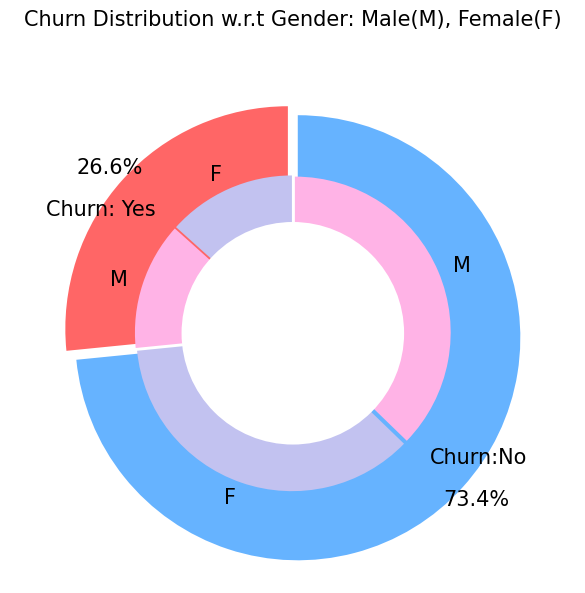

In [418]:
#Utilizamos otro gráfico para visualizar churn by gender

plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [419]:

fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

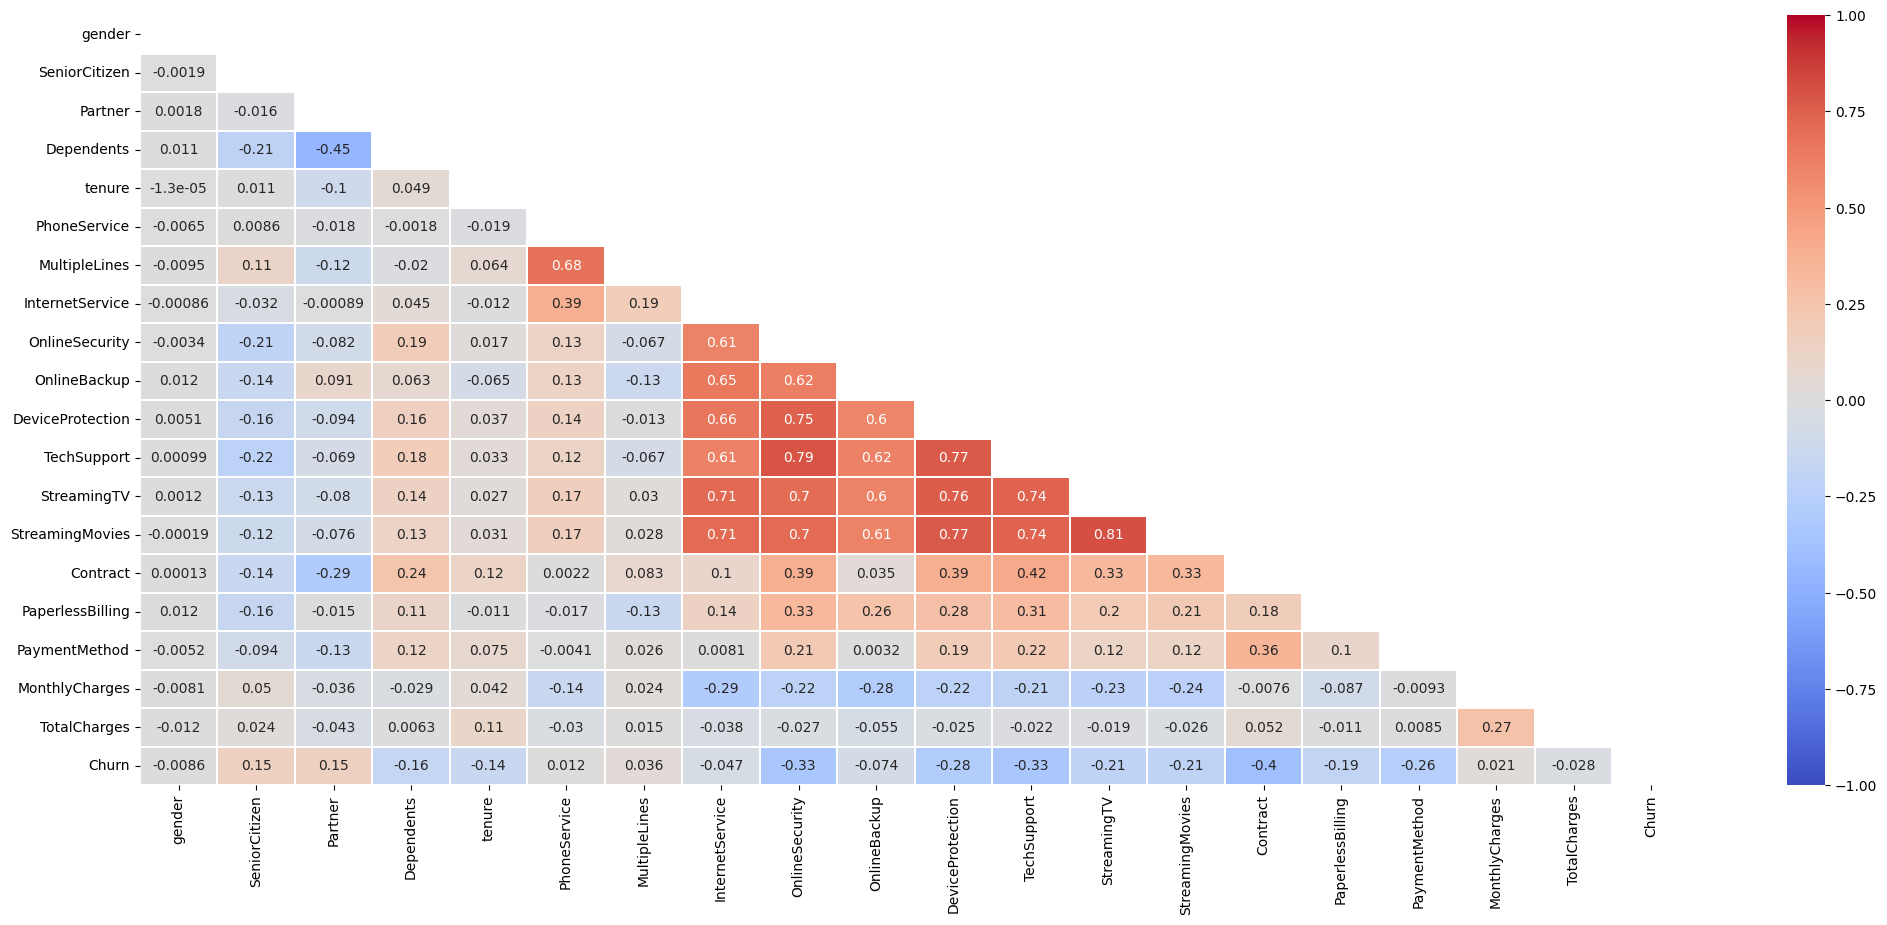

In [420]:
#Aplicamos un heatmap
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [421]:
#Dividimos en entrenamiento y test

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


1.- Evaluación del Modelo: Al dividir los datos, podemos entrenar el modelo en un conjunto (entrenamiento) y evaluarlo en otro conjunto independiente (prueba). Esto nos permite medir el rendimiento del modelo en datos que no ha visto antes, proporcionando una estimación más realista de su capacidad para generalizar a nuevos datos.

2.- Prevención del Sobreajuste: Si entrenamos y evaluamos el modelo en el mismo conjunto de datos, el modelo podría aprenderse demasiado bien los detalles y el ruido de esos datos específicos, un fenómeno conocido como sobreajuste. Al evaluar en un conjunto separado, podemos detectar si el modelo está sobreajustando.

3.- Validación Cruzada: En algunos casos, se utiliza una técnica llamada validación cruzada, donde los datos se dividen en múltiples subconjuntos y el modelo se entrena y evalúa varias veces, cada vez con un conjunto diferente de datos de prueba. Esto ayuda a asegurar que el modelo sea robusto y no dependa demasiado de una división específica de los datos.

4.- Comparación de Modelos: Dividir los datos permite comparar diferentes modelos o configuraciones de modelos de manera justa. Todos los modelos se evalúan en el mismo conjunto de prueba, lo que facilita la comparación de su rendimiento.

In [422]:
#Indicamos nuestra columna objetivo
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [423]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

test_size = 0.30

Este parámetro indica el porcentaje del conjunto de datos original que se asignará al conjunto de prueba. En este caso, 0.30 significa que el 30% de los datos se utilizarán para probar el modelo, mientras que el 70% restante se utilizará para entrenarlo.
La elección del tamaño del conjunto de prueba puede variar según el problema y la cantidad de datos disponibles. Un valor común es entre 20% y 30%.


random_state = 40

Este parámetro establece una semilla para el generador de números aleatorios utilizado para dividir los datos. Al fijar una semilla específica (en este caso, 40), garantizas que la división de los datos sea reproducible. Es decir, cada vez que ejecutes el código con la misma semilla, obtendrás la misma división de datos.
Esto es útil para la reproducibilidad de los experimentos y para comparar resultados de manera consistente.


stratify=y

Este parámetro asegura que la división de los datos mantenga la misma proporción de clases en el conjunto de entrenamiento y en el conjunto de prueba. Es especialmente útil cuando tienes un conjunto de datos desbalanceado.
En este caso, stratify=y significa que la variable objetivo y se utilizará para estratificar los datos.







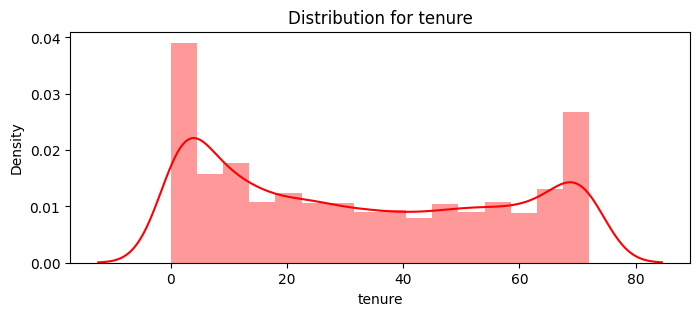

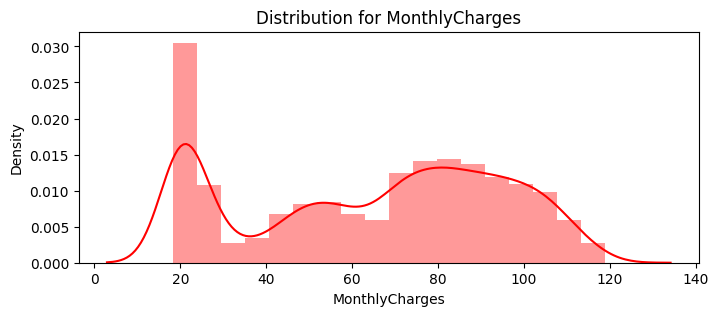

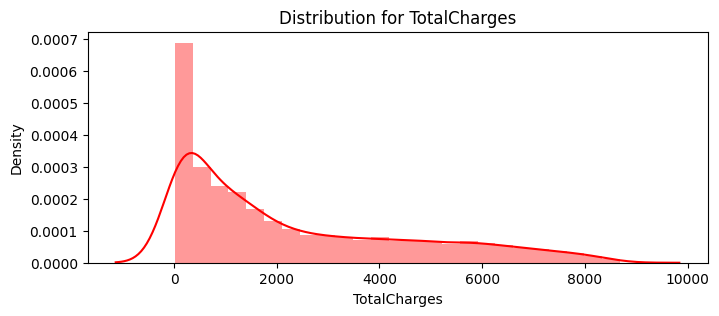

In [424]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [425]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


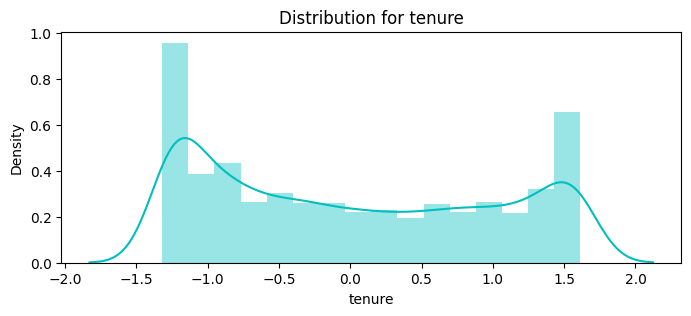

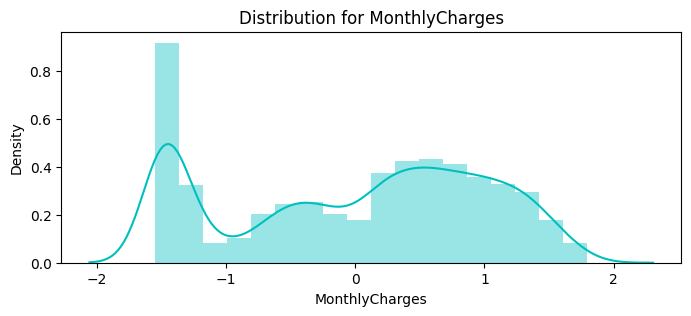

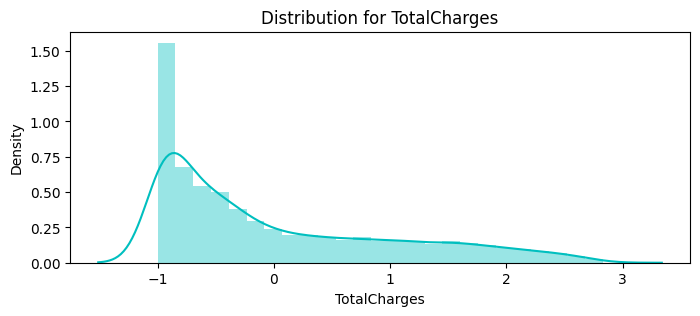

In [426]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [427]:
#Realizamos el escalamiento

#Esta lista contiene los nombres de las columnas categóricas que necesitan ser codificadas usando one-hot encoding.
#One-hot encoding convierte cada categoría en una columna binaria (0 o 1).
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']

#Esta lista se crea tomando todas las columnas de X_train, excluyendo las columnas numéricas (num_cols) y las que necesitan one-hot encoding (cat_cols_ohe).
#Las columnas restantes son aquellas que necesitan label encoding, que asigna un número entero a cada categoría.
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

#Se crea una instancia del StandardScaler, que es una herramienta para estandarizar las características numéricas.
scaler= StandardScaler()

#Se ajusta el scaler a los datos de entrenamiento (fit) y luego se transforman los datos (transform).
#Esto estandariza las características numéricas de X_train para que tengan una media de 0 y una desviación estándar de 1.
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [428]:
#Realizamos la predicción
#Usamos KNN

knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)


print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7586370089919545


In [429]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1552
           1       0.55      0.52      0.53       561

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113



La precisión entregada por KNN es de un 75% que es buena pero puede ser mejorada por eso se recomienda utilizar otro modelo

In [430]:
#Usamos SVN Support Vector Machine
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7917652626597255


In [431]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.64      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



La precisión entregada por KNN es de un 79% que es mejor que knn pero se recomienda utilizar otro modelo para comparar y escoger

In [432]:
#Probamos con RandomForest
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features='sqrt',  # Cambiado de 'auto' a 'sqrt'
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7979176526265973


In [433]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



De acuerdo a los resultados entregados se escoge el modelo con Random Forest

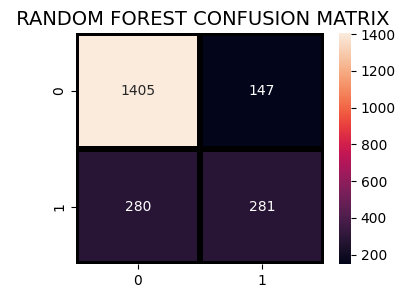

In [434]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

Verdaderos Positivos (VP): Los casos que son realmente positivos y que tu modelo también clasificó como positivos (la esquina superior izquierda).

Falsos Positivos (FP): Los casos que son realmente negativos pero que tu modelo clasificó como positivos (la esquina superior derecha).

Falsos Negativos (FN): Los casos que son realmente positivos pero que tu modelo clasificó como negativos (la esquina inferior izquierda).

Verdaderos Negativos (VN): Los casos que son realmente negativos y que tu modelo también clasificó como negativos (la esquina inferior derecha).

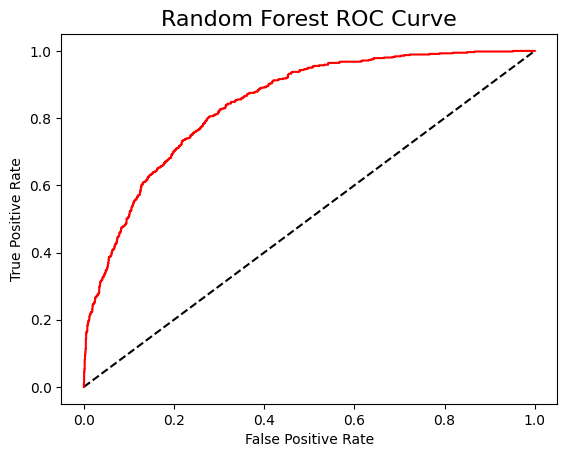

In [435]:
#Curva ROC
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Buen rendimiento: La curva del modelo está bastante cerca de la esquina superior izquierda, lo que indica que el modelo de Random Forest está haciendo un buen trabajo al distinguir entre las clases.

Mejor que un clasificador aleatorio: La curva está por encima de la línea diagonal, lo que significa que nuestro modelo es significativamente mejor que simplemente adivinar.

In [436]:
#Regresion Logistica
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7884524372929484


In [437]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.61      0.57      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.78      0.79      0.79      2113



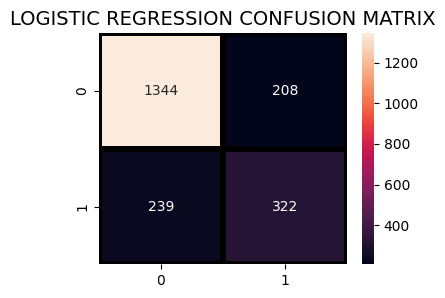

In [438]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

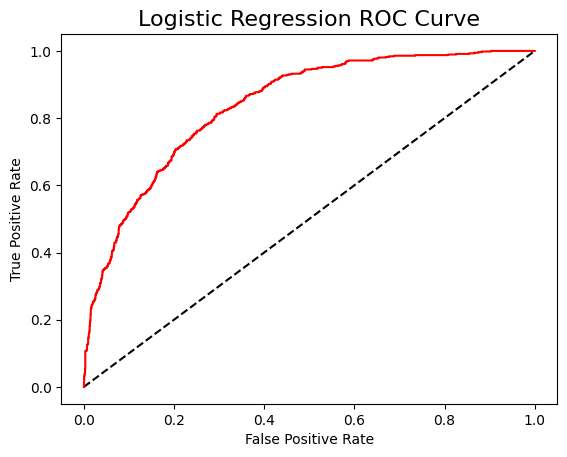

In [439]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [440]:
#AdaBoost
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.792238523426408

In [441]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



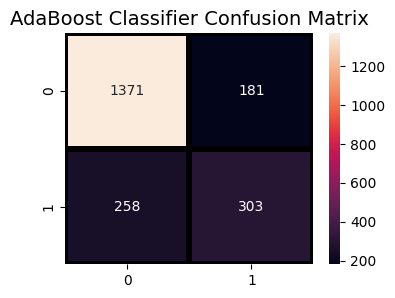

In [442]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

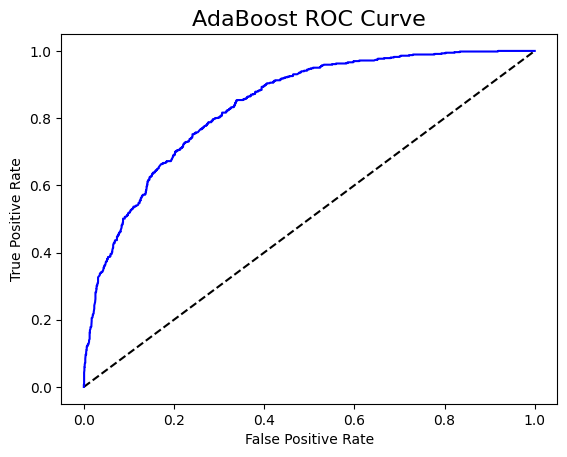

In [443]:
# Curva ROC del modelo AdaBoost
y_pred_prob_ada = a_model.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ada, tpr_ada, label='AdaBoost', color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve', fontsize=16)
plt.show()

In [444]:
#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7941315664931378


In [445]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



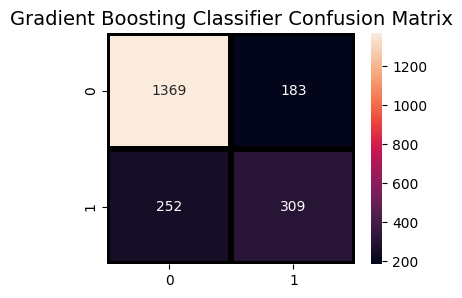

In [446]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [447]:
#Vamos a usar los modelos con mayor score


clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7979176526265973


In [448]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.80      0.79      2113



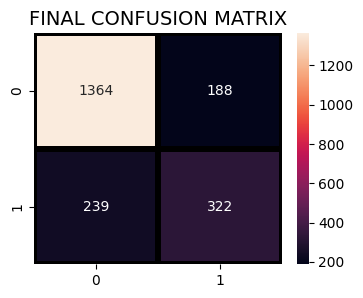

In [449]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

En la matriz de confusión podemos ver que: Hay un total de 1364+188=1552 valores reales de no abandono y el algoritmo predice 1364 de ellos como no abandonados y 188 de ellos como abandonados. Si bien hay 239 + 322 = 561 valores de abandono reales y el algoritmo predice 239 de ellos como valores de no abandono y 322 de ellos como valores de abandono.